# LECT02: Basic Statistics
## Practical Example: Auto.csv

### 1. Calculating a mean with Numpy
Import pandas and numpy

In [1]:
import pandas as pd
import numpy as np

Load our data using pandas and change origin numbers to category.

In [2]:
df_auto = pd.read_csv("Auto.csv", na_values='?')
df_auto.replace({"origin": {1:"American", 2:"European", 3:"Japanese"}}, inplace=True)

Calculate the mean weight of all cars in the dataset:

In [3]:
np.mean(df_auto["weight"])

2970.2619647355164

Calculate the mean weight of all cars from Europe

In [4]:
np.mean(df_auto[df_auto["origin"]=="European"]["weight"])

2423.3

### 2. Calculating a median with Numpy
Calculate the median weight of all cars in the dataset

In [5]:
np.median(df_auto["weight"])

2800.0

Calculate the median weight of all cars from Japan and America

In [6]:
median_weight_jap = np.median(df_auto[df_auto["origin"]=="Japanese"]["weight"])
median_weight_ame = np.median(df_auto[df_auto["origin"]=="American"]["weight"])

Compare the median weights and display the result 

In [7]:
if median_weight_jap > median_weight_ame:
    comparison = "larger than"
elif median_weight_jap < median_weight_ame:
    comparison = "smaller than"
else:
    comparison = "equal to"
"The median weight of Japanese cars ({}) is {} the median weight of American cars ({})".format(
    median_weight_jap, comparison, median_weight_ame)

'The median weight of Japanese cars (2155.0) is smaller than the median weight of American cars (3372.5)'

### 3. Calculating quartiles with Numpy
Calculate using pandas `describe()` function:

In [8]:
df_auto["weight"].describe()[4:7]

25%    2223.0
50%    2800.0
75%    3609.0
Name: weight, dtype: float64

Calculate using numpy and save the results to separate variables:

In [9]:
weight_q_25 = np.quantile(df_auto["weight"], q=0.25)
weight_q_50 = np.quantile(df_auto["weight"], q=0.50)
weight_q_75 = np.quantile(df_auto["weight"], q=0.75)

Display a statement with the mean and the interquartile range

In [10]:
"The median weight of a car (N = {}) is {} kg. The middle 50% of cars fall between {} kg and {} kg.".format(
    len(df_auto), weight_q_50, weight_q_25, weight_q_75)

'The median weight of a car (N = 397) is 2800.0 kg. The middle 50% of cars fall between 2223.0 kg and 3609.0 kg.'

### 4. Calculating Variance and Standard Deviation with Numpy
Calculate Variance and Standard Deviation for weight of all cars:

In [11]:
weight_std = np.std(df_auto["weight"])
weight_var = np.var(df_auto["weight"])
"The standard deviation and variance of the weight for all cars are {:.2f} and {:.2f}, respectively.".format(
    weight_std, weight_var)

'The standard deviation and variance of the weight for all cars are 846.84 and 717130.46, respectively.'

Calculate Variance and Standard Deviation for weight of Japanese cars:

In [12]:
weight_jap_std = np.std(df_auto[df_auto["origin"]=="Japanese"]["weight"])
weight_jap_var = np.var(df_auto[df_auto["origin"]=="Japanese"]["weight"])
"The standard deviation and variance of the weight for Japanese cars are {:.2f} and {:.2f}, respectively.".format(
    weight_jap_std, weight_jap_var)

'The standard deviation and variance of the weight for Japanese cars are 318.46 and 101418.25, respectively.'

Calculate Variance and Standard Deviation for weight of European cars:

In [13]:
weight_eur_std = np.std(df_auto[df_auto["origin"]=="European"]["weight"])
weight_eur_var = np.var(df_auto[df_auto["origin"]=="European"]["weight"])
"The standard deviation and variance of the weight for European cars are {:.2f} and {:.2f}, respectively.".format(
    weight_eur_std, weight_eur_var)

'The standard deviation and variance of the weight for European cars are 486.53 and 236711.72, respectively.'

### 5. Calculating Standard Errors with Numpy
Create a function to calculate the standard error

In [14]:
stderr = lambda x: np.sqrt(np.var(x)/x.shape[0])

Calculate the standard error with our new function

In [15]:
stderr(df_auto["weight"])

42.5014582752255

Display the 95% confidence interval of the mean

In [16]:
"Confidence interval for mean weight of cars: 95% CI [{:.2f} kg, {:.2f} kg]".format(
    np.mean(df_auto["weight"])-stderr(df_auto["weight"])*1.96,
    np.mean(df_auto["weight"])+stderr(df_auto["weight"])*1.96)

'Confidence interval for mean weight of cars: 95% CI [2886.96 kg, 3053.56 kg]'

## Case study: Analyzing a collection of Tweets
Download `realdonaldtrump.csv`, a collection of more than 43k tweets from Donald Trump between 2009 and 2020, from [kaggle](https://www.kaggle.com/austinreese/trump-tweets) and load the dataset with pandas:


In [17]:
df_trump = pd.read_csv("realdonaldtrump.csv", na_values=['?','']) # Import
df_trump.set_index("id") # Set id as row index
df_trump["date"] = pd.to_datetime(df_trump['date']) # Set column to datetime

Most retweeted and liked tweets

In [18]:
print("Most retweeted: {}".format(df_trump.iloc[df_trump["retweets"].argmax()]["content"]))
print("Most favorited: {}".format(df_trump.iloc[df_trump["favorites"].argmax()]["content"]))

Most retweeted: # FraudNewsCNN # FNNpic.twitter.com/WYUnHjjUjg
Most favorited: A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!


#### Word frequency analysis and wordcloud visualization
Clean the contents of the individual tweets and join into a long text

In [19]:
import re
# Get individual tweets
tweets = list(df_trump["content"])
# Clean by stripping URLs, any punctuations, twitter handles, realDonaldTrump and any non alphanumeric characters
tweets = [re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|realDonaldTrump"," ",tweet) for tweet in tweets]
# Join all tweets into a long text
text = " ".join(tweets)

Create wordcloud in shape of Trump outline

(-0.5, 1062.5, 1090.5, -0.5)

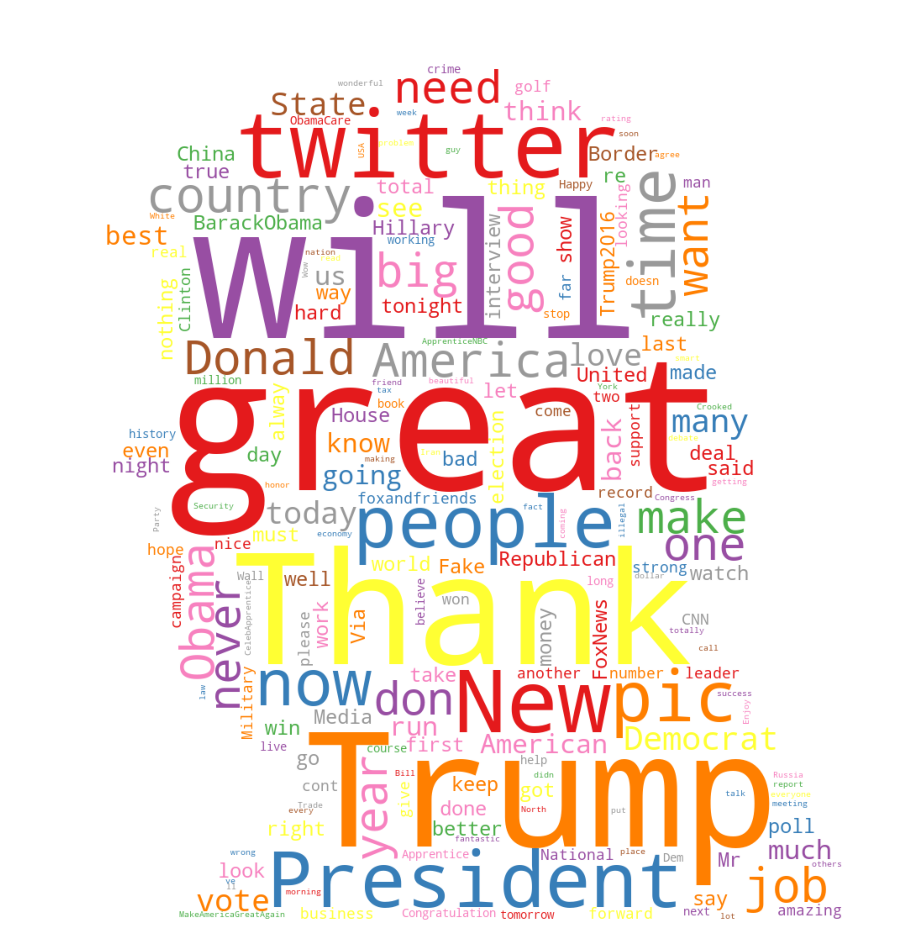

In [20]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
mask = np.array(Image.open('trump_outline.jpg'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
    background_color='white', colormap='Set1', collocations=False, stopwords = STOPWORDS, mask=mask).generate(text)
plt.figure(figsize=(16, 20))
plt.imshow(wordcloud)
plt.axis("off")

#### When does Trump tweet during the day?

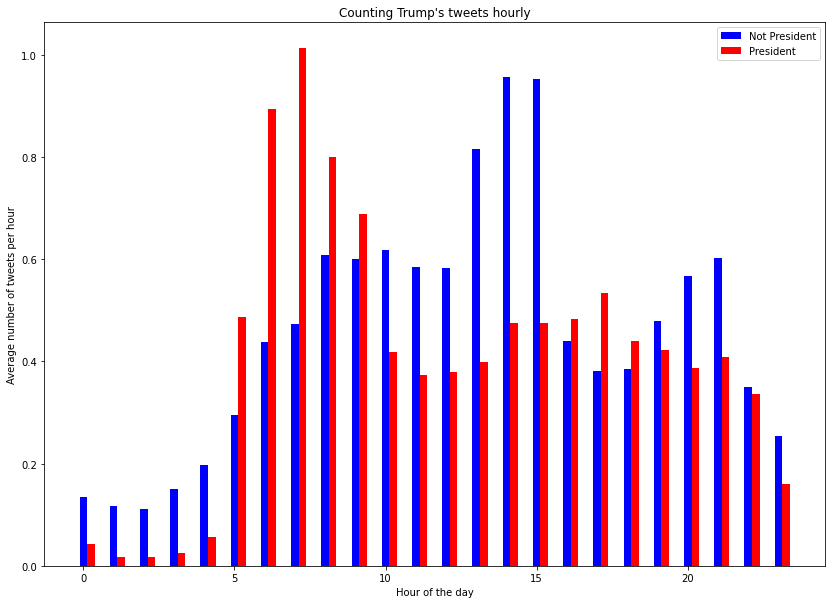

In [21]:
inaug_date = pd.to_datetime('2017-01-20')
df_trump["president"] = df_trump.apply(lambda x: x.date >= inaug_date, axis=1) # New column indicating whether Trump was president
days_before = pd.Timedelta(inaug_date - df_trump['date'].min()).days
days_after = pd.Timedelta(df_trump['date'].max() - inaug_date).days
avg_hourly_counts_before = df_trump[-df_trump.president]['date'].groupby(df_trump['date'].dt.hour).count()/days_before # Average number of hourly tweets
avg_hourly_counts_after = df_trump[df_trump.president]['date'].groupby(df_trump['date'].dt.hour).count()/days_after # Average number of hourly tweets
hours = np.arange(24)
plt.figure(figsize=(14, 10))
ax = plt.subplot(111)
ax.bar(hours,avg_hourly_counts_before, width=0.25, color='blue', label='Not President')
ax.bar(hours+0.25,avg_hourly_counts_after, width=0.25, color='red', label='President')
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Average number of tweets per hour")
ax.set_title("Counting Trump's tweets hourly")
plt.legend()
plt.show()

#### How much has Trump tweeted over time?

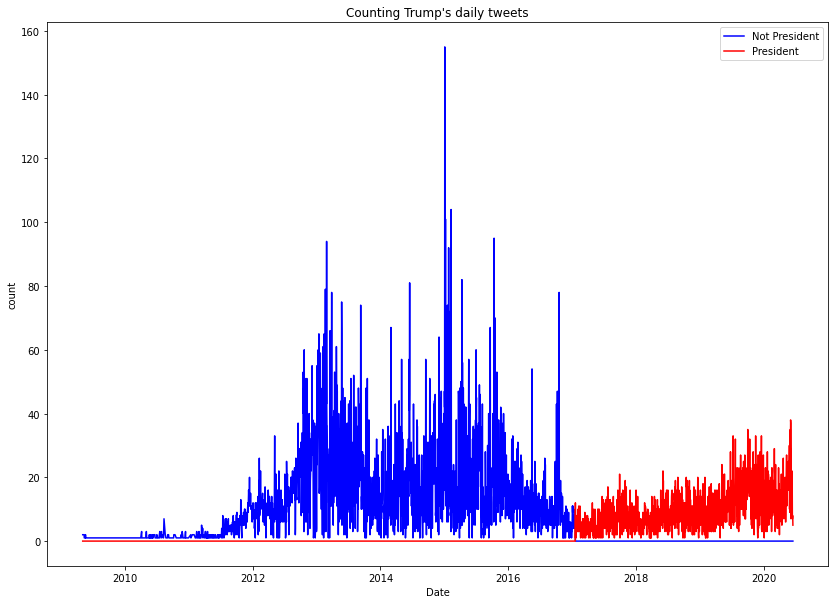

In [22]:
daily_counts = df_trump['date'].groupby([df_trump['date'].dt.date,df_trump.president]).count() # Count number of daily tweets
daily_counts = daily_counts.unstack(level=-1).fillna(0)
daily_counts.columns = ['not_president', 'president']
plt.figure(figsize=(14, 10))
ax = plt.subplot(111)
ax.plot(daily_counts.index, daily_counts['not_president'], color='blue', label='Not President')
ax.plot(daily_counts.index, daily_counts['president'], color='red', label='President')
ax.set_xlabel("Date")
ax.set_ylabel("count")
ax.set_title("Counting Trump's daily tweets")
plt.legend()
plt.show()